<a href="https://colab.research.google.com/github/SureshkumarRadadiya/bostonhousepricing/blob/main/Machine_Learning_algorithm_for_customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import our necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#read our csv dataset
customer_churn= pd.read_csv("Customer-Churn.csv")

In [ ]:
#if you want to read top five columns
customer_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
customer_churn.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [ ]:
#what type of data your customer_churn
type(customer_churn)

In [ ]:
#how many rows and columns are present in the dataset
customer_churn.shape

In [ ]:
#interested to the columns names
customer_churn.columns

In [ ]:
#is there any null values present in the dataset
customer_churn.isnull().sum()

**five point summary of the dataframe**

In [ ]:
customer_churn.describe()

**Data Manipulation**

In [ ]:
#a. Extract the 5th column & store it in ‘customer_5’
# here indexing starting from 0 and that the reason taken [0-4]
customer_5=customer_churn.iloc[:,4]

In [ ]:
customer_5.head()

0    No
1    No
2    No
3    No
4    No
Name: Dependents, dtype: object

In [ ]:
#b. Extract the 15th column & store it in ‘customer_15’
#here indexing starting from 0 and that the reason taken [0-14]
customer_15 = customer_churn.iloc[:,14]

In [ ]:
customer_15.head()

0    No
1    No
2    No
3    No
4    No
Name: StreamingMovies, dtype: object

In [ ]:
#c. Extract all the male senior citizens whose Payment Method is Electronic check & store the result in ‘senior_male_electronic’
my_subset =(customer_churn['gender']=='Male') & (customer_churn['SeniorCitizen']==1) &(customer_churn['PaymentMethod']=='Electronic check')


In [ ]:
senior_male_electronic=customer_churn[my_subset]

In [ ]:
#first five rows of the dataframe
senior_male_electronic.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
55,1658-BYGOY,Male,1,No,No,18,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes
57,5067-XJQFU,Male,1,Yes,Yes,66,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,108.45,7076.35,No
78,0191-ZHSKZ,Male,1,No,No,30,Yes,No,DSL,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,74.75,2111.3,No
91,2424-WVHPL,Male,1,No,No,1,Yes,No,Fiber optic,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,74.70,74.7,No


In [ ]:
#interested to see only this columns and create the dataframe with this three columns
senior_male_electronic[['gender','SeniorCitizen','PaymentMethod']]

,gender,SeniorCitizen,PaymentMethod
20,Male,1,Electronic check
55,Male,1,Electronic check
57,Male,1,Electronic check
78,Male,1,Electronic check
91,Male,1,Electronic check
...,...,...,...
6837,Male,1,Electronic check
6894,Male,1,Electronic check
6914,Male,1,Electronic check
6967,Male,1,Electronic check


In [ ]:
#d. Extract all those customers whose tenure is greater than 70 months or their Monthly charges is more than 100$ & store the result in ‘customer_total_tenure’
my_second_subset=(customer_churn['tenure']>70) | (customer_churn['MonthlyCharges']>100)

In [ ]:
customer_total_tenure= customer_churn[my_second_subset]

In [ ]:
customer_total_tenure.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No


In [ ]:
customer_total_tenure[['tenure','MonthlyCharges']]

,tenure,MonthlyCharges
8,28,104.80
12,58,100.35
13,49,103.70
14,25,105.50
15,69,113.25
...,...,...
7023,63,103.50
7034,67,102.95
7037,72,21.15
7039,72,103.20


In [ ]:
#e. Extract all the customers whose Contract is of two years, payment method is Mailed check & the value of Churn is ‘Yes’ & store the result in ‘two_mail_yes’
my_another_subset =(customer_churn['Contract']=="Two year") & (customer_churn['PaymentMethod']=="Mailed check") &(customer_churn['Churn']=="Yes")

In [ ]:
two_mail_yes= customer_churn[my_another_subset]

In [ ]:
two_mail_yes.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
268,6323-AYBRX,Male,0,No,No,59,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1099.6,Yes
5947,7951-QKZPL,Female,0,Yes,Yes,33,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.50,740.3,Yes
6680,9412-ARGBX,Female,0,No,Yes,48,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,No,Two year,Yes,Mailed check,95.50,4627.85,Yes


In [ ]:
two_mail_yes[['Contract','PaymentMethod','Churn']]

,Contract,PaymentMethod,Churn
268,Two year,Mailed check,Yes
5947,Two year,Mailed check,Yes
6680,Two year,Mailed check,Yes


In [ ]:
#. Extract 333 random records from the customer_churn dataframe & store the result in ‘customer_333’
customer_333=customer_churn.sample(n=333)

In [ ]:
customer_333.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4426,8652-YHIYU,Female,0,No,Yes,16,Yes,Yes,Fiber optic,No,...,No,Yes,No,No,One year,Yes,Credit card (automatic),79.50,1264.2,No
5423,5228-EXCET,Male,0,No,No,13,Yes,No,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,80.85,1008.7,Yes
2908,7780-OTDSO,Male,0,Yes,No,18,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.40,1742.95,Yes
1323,4565-NLZBV,Female,0,Yes,No,71,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),24.65,1710.15,No
1436,9546-CQJSU,Female,0,No,No,2,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,91.40,193.6,Yes


In [ ]:
#Get the count of different levels from the ‘Churn’ column
customer_churn['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [ ]:
customer_churn['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

**Data Visualization**

<BarContainer object of 3 artists>

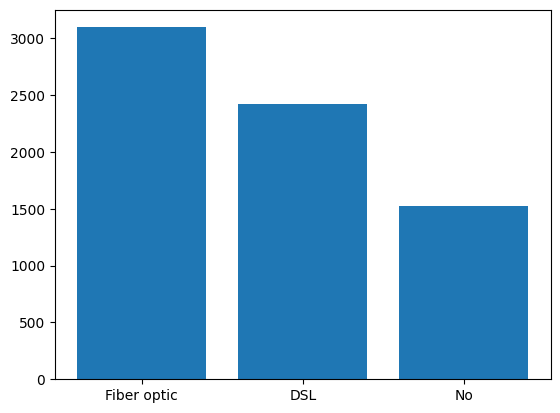

In [ ]:
# Build a bar-plot for the ’Internet Service’ column:
plt.bar(customer_churn['InternetService'].value_counts().keys().tolist(),customer_churn['InternetService'].value_counts().tolist())


In [ ]:
customer_churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
#this is the first approach i can see my internetService column's value
customer_churn['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [ ]:
#to find out the keys only from InternetService column
customer_churn['InternetService'].value_counts().keys().tolist()

['Fiber optic', 'DSL', 'No']

In [ ]:
plt_bar_keys=customer_churn['InternetService'].value_counts().keys().tolist()

In [ ]:
customer_churn['InternetService'].value_counts().tolist()

[3096, 2421, 1526]

In [ ]:
plt_bar_values=customer_churn['InternetService'].value_counts().tolist()

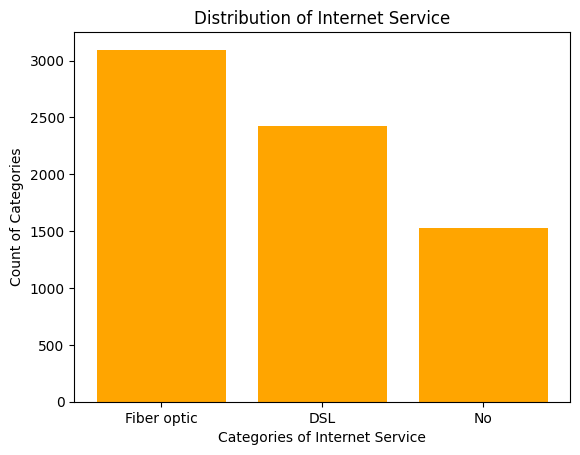

In [ ]:
# Build a bar-plot for the ’Internet Service’ column with adding the color orange
plt.bar(plt_bar_keys,plt_bar_values,color='orange')
#Set x-axis label to ‘Categories of Internet Service’
plt.xlabel('Categories of Internet Service')
#Set y-axis label to ‘Count of Categories’
plt.ylabel('Count of Categories')
#Set the title of plot to be ‘Distribution of Internet Service’
plt.title('Distribution of Internet Service')
#now we can show the plt
plt.show()

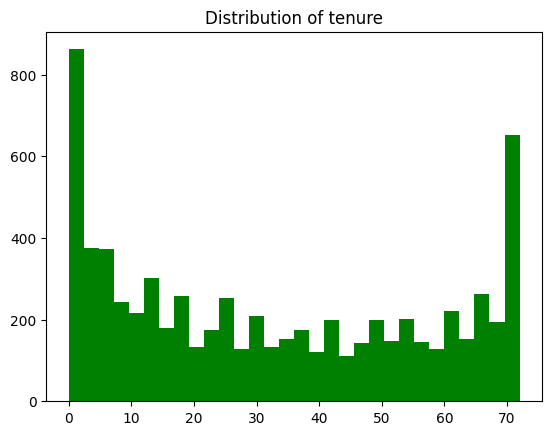

In [ ]:
#next we have to create the histogram
#b. Build a histogram for the ‘tenure’ column:
 #i. Set the number of bins to be 30
#ii. Set the color of the bins to be ‘green’
 #iii. Assign the title ‘Distribution of tenure’
plt.hist(customer_churn['tenure'],bins=30,color='green')
plt.title('Distribution of tenure')
#to display chart plot
plt.show()

In [ ]:
#difference between bar plot and histogram ??
#Bar plot longly used for categorical column and
#when we need continuous numerical column that time
#we can use histogram.

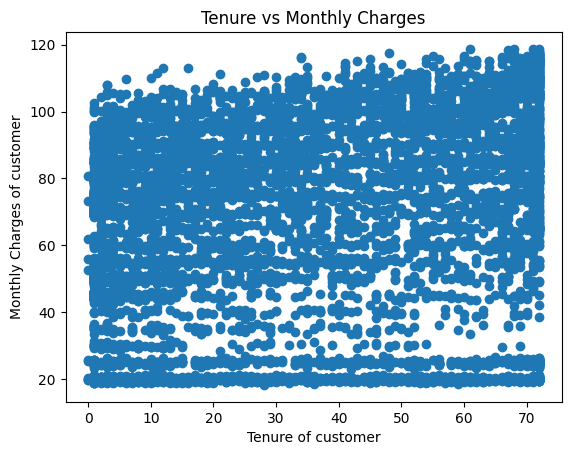

In [ ]:
#c. Build a scatter-plot between ‘Monthly Charges’ & ‘tenure’. Map ‘Monthly Charges’ to the y-axis & ‘tenure’ to the ‘x-axis’:
#i. Assign the points a color of ‘brown’
#ii. Set the x-axis label to ‘Tenure of customer’
#iii. Set the y-axis label to ‘Monthly Charges of customer’
#iv. Set the title to ‘Tenure vs Monthly Charges’

plt.scatter(x=customer_churn['tenure'],y=customer_churn['MonthlyCharges'])
plt.xlabel('Tenure of customer')
plt.ylabel('Monthly Charges of customer')
plt.title('Tenure vs Monthly Charges')
plt.show()

<Axes: title={'center': 'tenure'}, xlabel='[Contract]'>

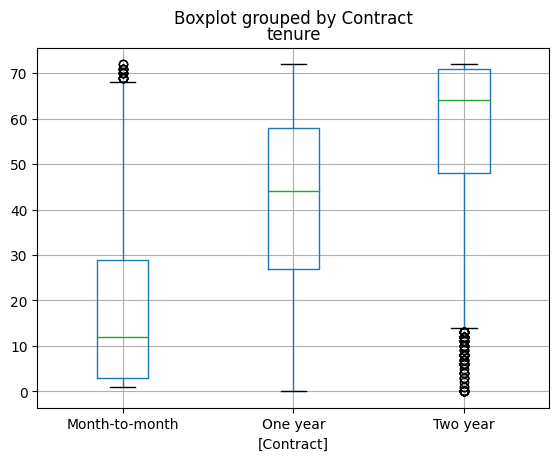

In [ ]:
#d. #Build a box-plot between ‘tenure’ & ‘Contract’.
#Map ‘tenure’ on the y-axis & ‘Contract’ on the x-axis.
customer_churn.boxplot(column=['tenure'],by=['Contract'])

In [ ]:
#what we can understand from this box plot
#1. if the contract is two year then the tenure is approxmately 65.
#2. if the contract is one year then the tenure is approxmately 45.
#3. if the contract is Month-to-month then the tenure in approxmately 15.

**machine learning algo (Linear Regression** Model)

In [ ]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
#dependent variable is ‘MonthlyCharges’ and independent variable is ‘tenure’
customer_churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
customer_churn['MonthlyCharges']

0        29.85
1        56.95
2        53.85
3        42.30
4        70.70
         ...  
7038     84.80
7039    103.20
7040     29.60
7041     74.40
7042    105.65
Name: MonthlyCharges, Length: 7043, dtype: float64

In [ ]:
customer_churn['tenure']

0        1
1       34
2        2
3       45
4        2
        ..
7038    24
7039    72
7040    11
7041     4
7042    66
Name: tenure, Length: 7043, dtype: int64

In [ ]:
#extracting the data from Monthly charges column and added inside y variable
#extracting the data from tenure columns and added inside the x variable
y=customer_churn[['MonthlyCharges']] #dependent variable
x=customer_churn[['tenure']] #independent variable

In [ ]:
y.head(),x.head()

(   MonthlyCharges
 0           29.85
 1           56.95
 2           53.85
 3           42.30
 4           70.70,
    tenure
 0       1
 1      34
 2       2
 3      45
 4       2)

In [ ]:
#Divide the dataset into train and test sets in 70:30 ratio.
#now we can divide it in x_train, x_test, y_train, y_test
train_test_split(x,y,test_size=0.30,random_state=0)

[      tenure
 3580       9
 2364      14
 6813      64
 789       72
 561        3
 ...      ...
 4931      15
 3264      10
 1653      58
 2607       1
 2732       4
 
 [4930 rows x 1 columns],
       tenure
 2200      19
 4627      60
 3225      13
 2828       1
 3768      55
 ...      ...
 4448      30
 1231      20
 3304      69
 4805      52
 5843      35
 
 [2113 rows x 1 columns],
       MonthlyCharges
 3580           72.90
 2364           82.65
 6813           47.85
 789            69.65
 561            23.60
 ...              ...
 4931          103.45
 3264           91.10
 1653           20.75
 2607           69.75
 2732           20.40
 
 [4930 rows x 1 columns],
       MonthlyCharges
 2200           58.20
 4627          116.60
 3225           71.95
 2828           20.45
 3768           77.75
 ...              ...
 4448           99.70
 1231           64.40
 3304          109.95
 4805           24.55
 5843           81.60
 
 [2113 rows x 1 columns]]

In [ ]:
#in machine learning the term "Random State" refers to the seed value used by pseudorandom number generators.
#Many machine learning algorithms involves some element of randomness, especially when it comes to intilizing
#parameters or shuffing the data. The random state allows you to control this randomness by specifying
#a seed value.
#setting a random state ensures that the results of your Machine Learning algorithm are reproduceible.
#if you use the same random state , you should get the same set of random numbers each time when u run the code,
#This can be crucial for your debugging, sharing the results or comparing different models.

# for example in python sklearn library, many algorithm and functions have a `random_state` parameters
#that you can set to a specific integer value.
#This ensure that the randomness is consistent across runs if you use the same seed.

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=0)

In [ ]:
#to see the shape of the data ( rows and columns) for all 4 variables
#x_train repesent all the training values the feature of independent variable
#x_test represent all the testing values the feature of independent variable

#y_train represent all the training values the feature of depedent variable
#y_test represent all the testing values the feature of dependent variable

x_train.shape,x_test.shape,y_train.shape, y_test.shape

((4930, 1), (2113, 1), (4930, 1), (2113, 1))

In [ ]:
#if we calculate the test size 0.30
#training_data+testing_data=4930+2113

In [ ]:
7043*30/100

2112.9

**Model Building**

In [ ]:
#why we divide the data into train and test split?
#dividing the data into training and testing sets is a common practise in ML to asses how
#well a model generalizes to new, unseen data.
#so, why it is done

#1. Model evalution
#2. Preventing overfitting
#3. Generaliztion Assesment
#4. Hyper parameter tuning

#when splitting the data, its common to use, for example 80/20=100, 70/30=100 ratio.

In [ ]:
#Build the model on train set and predict the values on test set
#how we can create the model
regressor_model=LinearRegression() #you have to initialize the model constructor

In [ ]:
type(regressor_model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#now i am going to fit the data
regressor_model.fit(x_train,y_train)

LinearRegression()

In [ ]:
#now we can predict
y_pred=regressor_model.predict(x_test)
print(y_pred[:5])

[[60.95089608]
 [72.98096699]
 [59.1903979 ]
 [55.66940154]
 [71.51388517]]


In [ ]:
print(y_pred,y_test)

[[60.95089608]
 [72.98096699]
 [59.1903979 ]
 ...
 [75.62171426]
 [70.63363608]
 [65.6455579 ]]       MonthlyCharges
2200           58.20
4627          116.60
3225           71.95
2828           20.45
3768           77.75
...              ...
4448           99.70
1231           64.40
3304          109.95
4805           24.55
5843           81.60

[2113 rows x 1 columns]


In [ ]:
#After predicting the values, find the root mean square error
from sklearn.metrics import mean_squared_error
print(f"find the root mean squared error {np.sqrt(mean_squared_error(y_test,y_pred))}")

find the root mean squared error 29.394584027273893


**how to export the model**

In [ ]:
import joblib

In [ ]:
#save the trained model to a file using joblib
joblib.dump(regressor_model,'regressor_model_save.joblib')

['regressor_model_save.joblib']

In [ ]:
#load your model
#basically inside the bracket you have to provide the path
loaded_regression_model=joblib.load('regressor_model_save.joblib')

In [ ]:
#Now you can use loaded_regression_model for predictions with my exported model
predictions = loaded_regression_model.predict(x_test)

In [ ]:
print(predictions[:5])

[[60.95089608]
 [72.98096699]
 [59.1903979 ]
 [55.66940154]
 [71.51388517]]


**machine learning algo (Logistic Regression Model)**

In [ ]:
#Build a simple logistic regression model where
#dependent variable is ‘Churn’ &
#independent variable is ‘MonthlyCharges

In [ ]:
x=customer_churn[['MonthlyCharges']] #independent variable
y=customer_churn[['Churn']] #dependent variable #target is my churn column

In [ ]:
print(x,type(x))

      MonthlyCharges
0              29.85
1              56.95
2              53.85
3              42.30
4              70.70
...              ...
7038           84.80
7039          103.20
7040           29.60
7041           74.40
7042          105.65

[7043 rows x 1 columns] <class 'pandas.core.frame.DataFrame'>


In [66]:
print(y,type(y))

     Churn
0       No
1       No
2      Yes
3       No
4      Yes
...    ...
7038    No
7039    No
7040    No
7041   Yes
7042    No

[7043 rows x 1 columns] <class 'pandas.core.frame.DataFrame'>


In [67]:
#now we can split the train and test data
#Divide the dataset in 65:35 ratio
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.35,random_state=0)

In [68]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((4577, 1), (2466, 1), (4577, 1), (2466, 1))

In [69]:
from sklearn.linear_model import LogisticRegression #import logistic regression

In [70]:
log_model=LogisticRegression() #init the model constructir for LogisticRegression

In [71]:
log_model.fit(x_train,y_train) #now we can fit the model on top of my training data

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [72]:
#now we can build the model on top of training set
y_pred=log_model.predict(x_test)

In [73]:
print(y_pred[:5])

['No' 'No' 'No' 'No' 'No']


In [74]:
#now we can create confusion matrix and accuracy score
#for the classification we need confusion matrix and accuracy score
from sklearn.metrics import confusion_matrix,accuracy_score

In [75]:
#now we can use that confusion matrix
confusion_matrix(y_test,y_pred)

array([[1815,    0],
       [ 651,    0]])

In [76]:
#now we can create the accuracy score
accuracy_score(y_test,y_pred)

0.7360097323600974

In [ ]:
#b. Build a multiple logistic regression model where
#dependent variable is ‘Churn’ &
#independent variables are ‘tenure’ & ‘MonthlyCharges’

In [77]:
x=customer_churn[['MonthlyCharges','tenure']] #independent variable
y=customer_churn[['Churn']] #dependent variable #target is my churn column

In [78]:
#now we can split the train and test data
#Divide the dataset in 80:20 ratio
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)

In [79]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((5634, 2), (1409, 2), (5634, 1), (1409, 1))

In [80]:
log_model=LogisticRegression()

In [81]:
#now we can build the model on top of training set
log_model.fit(x_train,y_train) #now we can fit the model on top of my training data

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [82]:
#now we can build the model on top of training set
y_pred=log_model.predict(x_test)

In [83]:
y_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [84]:
#now we can use that confusion matrix
confusion_matrix(y_test,y_pred)

array([[934, 107],
       [212, 156]])

In [85]:
#now we can create the accuracy score
accuracy_score(y_test,y_pred)

0.7735982966643009

In [86]:
#this is manually we can create the accuracy score
(934+156)/(935+156+107+212)

0.7730496453900709

In [87]:
#save the trained model to a file using joblib
joblib.dump(log_model,'log_model_save.joblib')

['log_model_save.joblib']

In [88]:
#load the model logistic regression
loaded_logistic_regression_model=joblib.load('log_model_save.joblib')

In [89]:
loaded_logistic_regression_model.predict(x_test)

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

**machine learning algo (Decesion Tree Model)**

In [ ]:
#a. Build a decision tree model where
#dependent variable is ‘Churn’ &
#independent variable is ‘tenure’

In [90]:
customer_churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [91]:
x=customer_churn[['tenure']] #independent variable
y=customer_churn[['Churn']] #dependent variable

In [92]:
print(x,type(x))

      tenure
0          1
1         34
2          2
3         45
4          2
...      ...
7038      24
7039      72
7040      11
7041       4
7042      66

[7043 rows x 1 columns] <class 'pandas.core.frame.DataFrame'>


In [93]:
print(y,type(y))

     Churn
0       No
1       No
2      Yes
3       No
4      Yes
...    ...
7038    No
7039    No
7040    No
7041   Yes
7042    No

[7043 rows x 1 columns] <class 'pandas.core.frame.DataFrame'>


In [94]:
from sklearn.tree import DecisionTreeClassifier, plot_tree #we have to import decesiontree classifier

In [95]:
#now we have to create the decesion tree classifier instance
my_decesion_tree_model=DecisionTreeClassifier() #your decesion tree classife

In [96]:
#now we can split the train and test data
#Divide the dataset in 80:20 ratio
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)

In [97]:
x_train.shape, x_test.shape, y_train.shape,y_test.shape

((5634, 1), (1409, 1), (5634, 1), (1409, 1))

In [98]:
my_decesion_tree_model.fit(x_train,y_train) #we have fit the model on top of the training data

DecisionTreeClassifier()

In [99]:
#now we can predict the model
y_pred=my_decesion_tree_model.predict(x_test)

In [100]:
y_pred #so my decesion tree classifer prediction

array(['No', 'No', 'No', ..., 'No', 'No', 'Yes'], dtype=object)

In [ ]:
#Build the confusion matrix and calculate the accuracy

In [101]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [102]:
confusion_matrix(y_test,y_pred)

array([[965,  76],
       [281,  87]])

In [103]:
(965+87)/(965+87+281+76) #so here we have to create the accuracy score manually

0.7466288147622427

In [104]:
accuracy_score(y_test,y_pred) #now here we can just call the accuracy score function

0.7466288147622427

In [ ]:
#so we can say that in decesion tree model our accuracy score is 0.75

In [105]:
import matplotlib.pyplot as plt

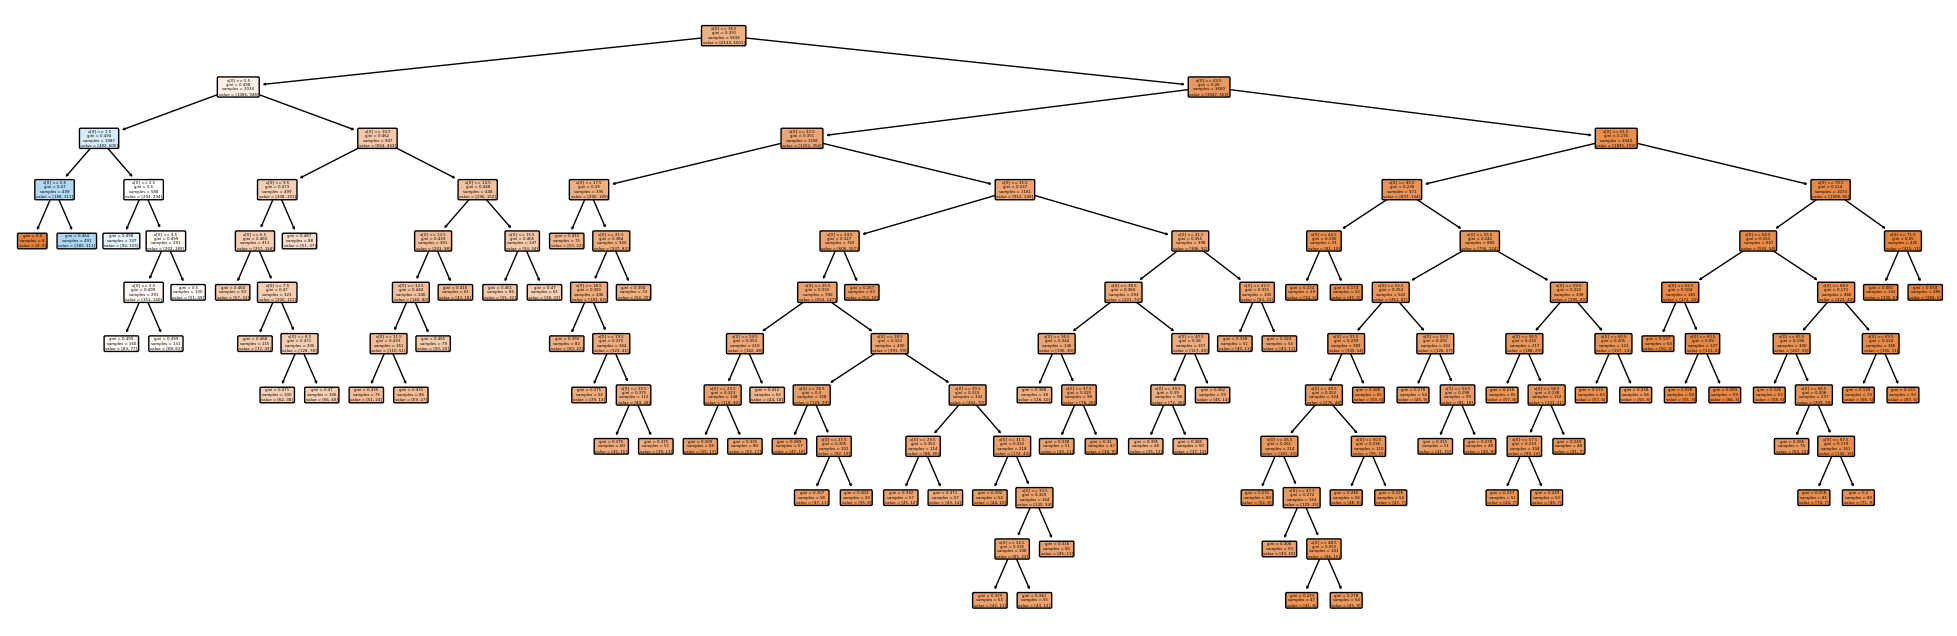

In [106]:
#now we can visualize the decesion tree model
plt.figure(figsize=(25,8))
plot_tree(my_decesion_tree_model, filled=True,rounded=True)
plt.show()

**as an example of Iris dataset decesion tree**

In [107]:
from sklearn import datasets

In [108]:
#load a sample data
iris=datasets.load_iris()

In [109]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [110]:
X_train, X_test, y_train, y_test=train_test_split(iris.data,iris.target,test_size=0.20,random_state=0)

In [111]:
#create a decesion tree model on top of iris dataset
model=DecisionTreeClassifier() #initalize the model

In [112]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

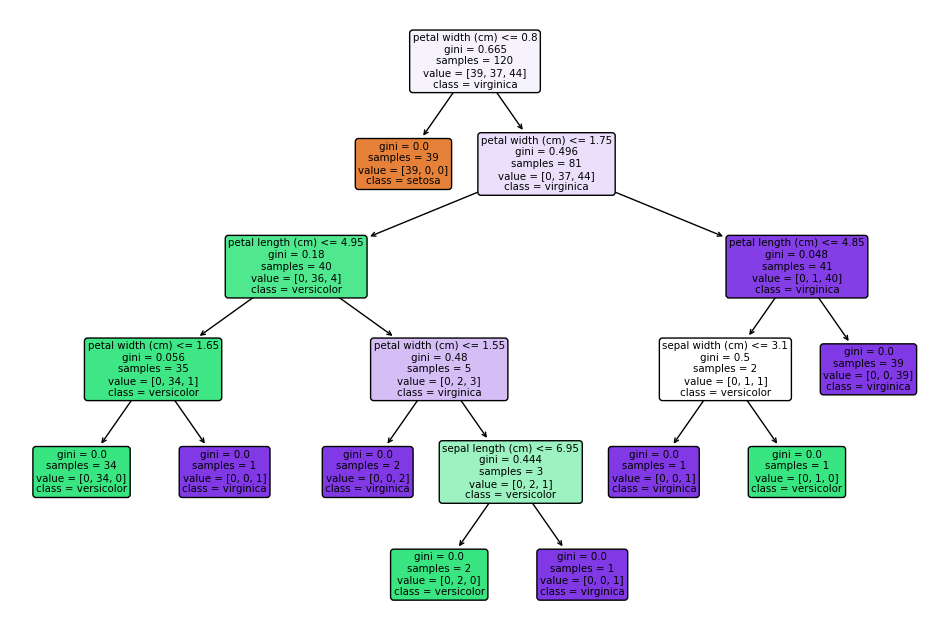

In [113]:
#now we can visualize the data
plt.figure(figsize=(12,8))
plot_tree(model,filled=True,feature_names=iris.feature_names, class_names=iris.target_names, rounded=True)
plt.show()

In [ ]:
#when we are using Decesion tree and when we can use Random forest model ??
#interpredibility: Decesion Trees are generally more interpretable compared to random forest.
#if understand and explaining the decesion making process is crucial, a single decesion tree might be preferred.

#Resource efficieny: Decesion trees are faster to train and require less computational resources compared
#to random forest. if you are working with a smaller dataset or have resource constarint, a decesion tree
#will be more suitable.

#overfitting Concerns: Decesion trees are prone to overfitting, especially if they are deep, regulization
#technique or limiting the maximum depth can help mitigate this but it is an important considerations.

#Feature importance: if you need to understand the importance of individual features in your model, decesion
#tree provide a direct measure of feature importance,

In [ ]:
#Random forest
#1. Improved generalization: Random forest are an ensemble of Decesion tree and they are known for better
#generalization performance. They reduce overfitting by combining multiple weak learners(trees) into a robust model.
#higher accuracy: in many cases random forest can provide higher accuracy compared to s single decesion tree,
#especially when dealing with complex datasets.

#handling missing values : Random forest can handle missing values in the datasets more gracefully than
#a single decesion tree. They use the majority vote from different trees to make predictions and reducing
#the impact of missing data.

##Robutness to outliers: Random forest are generally more robust to outliers and noise in the data compared
#to single decesion tree,

##if interpretibility is crucial and the datasets is small, a decesion tree might be sufficient.
## For larger and more complex datasets where accuracy is prioroty, Random forest are often a good choice.


**machine learning algo (Random Forest Model)**

In [ ]:
#random forest ensemble of decesion tree
#a. Build a Random Forest model where
#dependent variable is ‘Churn’ &
#independent variables are ‘tenure’ and ‘MonthlyCharges’

In [114]:
from sklearn.ensemble import RandomForestClassifier

In [118]:
#now we have to initalize your model
rf= RandomForestClassifier() #now we can create an instance

In [115]:
#now we can split the train and test data
#Divide the dataset in 70:30 ratio
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=0)

In [116]:
x_train.shape,x_test.shape,y_train.shape, y_test.shape

((4930, 1), (2113, 1), (4930, 1), (2113, 1))

In [119]:
rf.fit(x_train,y_train) #you can fit this model with x_train and y_train

<ipython-input-119-727e2e94ac1a>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train) #you can fit this model with x_train and y_train


RandomForestClassifier()

In [120]:
y_pred=rf.predict(x_test) #predict the testing data

In [121]:
y_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [122]:
confusion_matrix(y_test,y_pred)

array([[1446,  114],
       [ 409,  144]])

In [123]:
accuracy_score(y_test,y_pred)

0.7524846190250828

In [124]:
#export the model
joblib.dump(rf,'random_forest.joblib')

['random_forest.joblib']

In [125]:
#load the exported model
loaded_rf_model=joblib.load('random_forest.joblib')

In [126]:
loaded_rf_model.predict(x_test)

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)